In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
%matplotlib inline

### plt.pie(x, explode=None, labels=None, colors=None, autopct=None,pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None,radius=None, counterclock=True, wedgeprops=None, textprops=None,center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)
#### x       :(每一块)的比例，如果sum(x) > 1会使用sum(x)归一化；
#### labels  :(每一块)饼图外侧显示的说明文字；
#### explode :(每一块)离开中心距离；
#### startangle :起始绘制角度,默认图是从x轴正方向逆时针画起,如设定=90则从y轴正方向画起；
#### shadow  :在饼图下面画一个阴影。默认值：False，即不画阴影；
#### labeldistance :label标记的绘制位置,相对于半径的比例，默认值为1.1, 如<1则绘制在饼图内侧；
#### autopct :控制饼图内百分比设置,可以使用format字符串或者format function '%1.1f'指小数点前后位数(没有用空格补齐)；
#### pctdistance :类似于labeldistance,指定autopct的位置刻度,默认值为0.6；
#### radius  :控制饼图半径，默认值为1；
#### counterclock ：指定指针方向；布尔值，可选参数，默认为：True，即逆时针。将值改为False即可改为顺时针。
#### wedgeprops ：字典类型，可选参数，默认值：None。参数字典传递给wedge对象用来画一个饼图。例如：wedgeprops={'linewidth':3}设置wedge线宽为3。
#### textprops ：设置标签（labels）和比例文字的格式；字典类型，可选参数，默认值为：None。传递给text对象的字典参数。
#### center ：浮点类型的列表，可选参数，默认值：(0,0)。图标中心位置。
#### frame ：布尔类型，可选参数，默认值：False。如果是true，绘制带有表的轴框架。
##### rotatelabels ：布尔类型，可选参数，默认为：False。如果为True，旋转每个label到指定的角度。

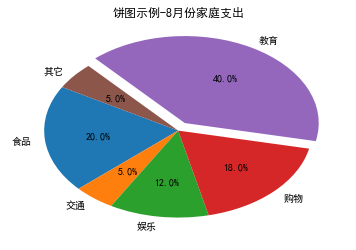

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

labels = ['食品','交通','娱乐','购物','教育','其它']  #标签
sizes = [20,5,12,18,40,5]   
explode = (0,0,0,0,0.1,0)   
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("饼图示例-8月份家庭支出")
plt.show()  

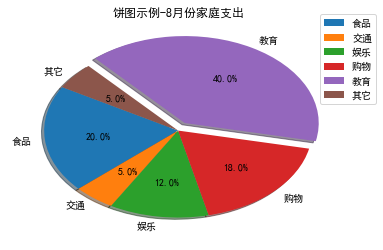

In [3]:
labels = ['食品','交通','娱乐','购物','教育','其它']  #标签
sizes = [20,5,12,18,40,5]   
explode = (0,0,0,0,0.1,0)   
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=150)
plt.title("饼图示例-8月份家庭支出")
plt.legend(loc="upper right",fontsize=10,bbox_to_anchor=(1.1,1.05),borderaxespad=0.3)
plt.show()  

### ### 我们将通过pie方法创建一个饼图和一个环形图，并显示如何用图例和注释对其进行标记。
### 我们可以为autopct参数提供一个函数，该函数将通过显示绝对值来扩展自动百分比标签。我们根据相对数据和所有值的已知总和来计算后者。

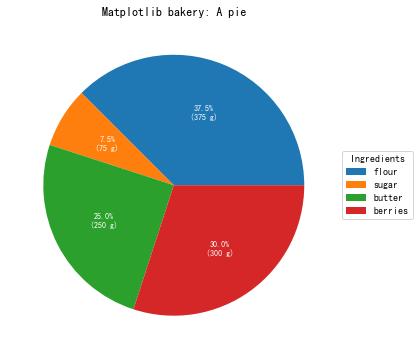

In [4]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

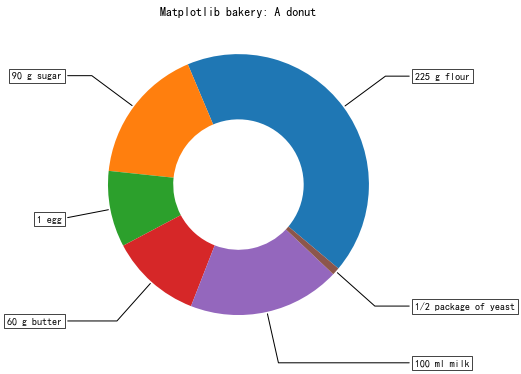

In [6]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()